In [898]:
import torch
import matplotlib.pyplot as plt

In [899]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [900]:
weight = 0.8
bias = 0.25

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = (weight * X + bias)

In [901]:
train_split = int((len(X) * 0.8))


X_train,y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [902]:
def plot_predictions(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,y_pred=None):
    plt.scatter(X_train, y_train, label="Train", s=10)
    plt.scatter(X_test, y_test, label="Test",s=10)
    if y_pred is not None:
        plt.scatter(X_test,y_pred,label="Predictions",s=10)

    plt.legend()

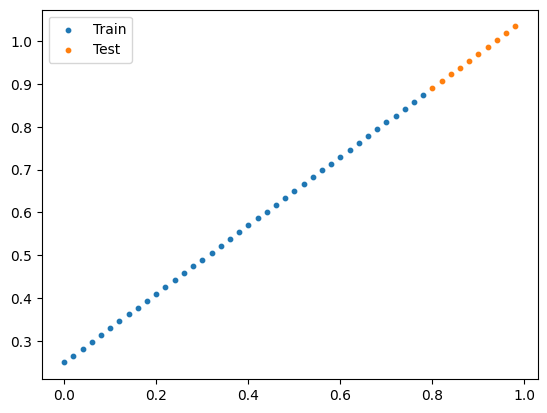

In [903]:
plot_predictions()

In [904]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1,out_features=1)

    def forward(self,x):
        return self.linear(x)

In [905]:
torch.manual_seed(42)
model_1 = LinearRegressionModel()

list(model_1.parameters()), model_1.state_dict()

([Parameter containing:
  tensor([[0.7645]], requires_grad=True),
  Parameter containing:
  tensor([0.8300], requires_grad=True)],
 OrderedDict([('linear.weight', tensor([[0.7645]])),
              ('linear.bias', tensor([0.8300]))]))

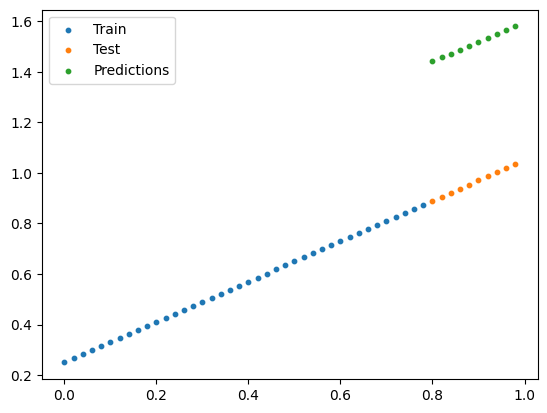

In [906]:
model_1.eval()

with torch.inference_mode():
    y_pred = model_1(X_test)
    plot_predictions(y_pred=y_pred)

In [907]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(lr=0.1,params=model_1.parameters())

In [908]:
model_1.to(device)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [909]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [910]:
epochs = 200

train_mae_values = []
test_mae_values = []
epochs_values = []

for epoch in range(epochs + 1):
    model_1.train()
    y_pred = model_1(X_train)

    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if epoch % 10 == 0:
        train_mae_values.append(loss.item())
        epochs_values.append(epoch)

        model_1.eval()
        with torch.inference_mode():
            y_pred_test = model_1(X_test)
            test_loss = loss_fn(y_pred_test, y_test)
            test_mae_values.append(test_loss)

        print(f"Epoch: {epoch} | Train MSE: {loss} | Test MSE: {test_loss} ")

Epoch: 0 | Train MSE: 0.3206244707107544 | Test MSE: 0.12926283478736877 
Epoch: 10 | Train MSE: 0.06249544769525528 | Test MSE: 0.1904609054327011 
Epoch: 20 | Train MSE: 0.021360663697123528 | Test MSE: 0.0061644092202186584 
Epoch: 30 | Train MSE: 0.005489341914653778 | Test MSE: 0.022635584697127342 
Epoch: 40 | Train MSE: 0.001280746073462069 | Test MSE: 0.0021502624731510878 
Epoch: 50 | Train MSE: 0.00042296768515370786 | Test MSE: 0.0007257075631059706 
Epoch: 60 | Train MSE: 0.00022307697508949786 | Test MSE: 0.0011052569607272744 
Epoch: 70 | Train MSE: 0.00011728422396117821 | Test MSE: 4.4394804717740044e-05 
Epoch: 80 | Train MSE: 4.88174227939453e-05 | Test MSE: 0.00012739414523821324 
Epoch: 90 | Train MSE: 1.440629148419248e-05 | Test MSE: 1.76021276274696e-05 
Epoch: 100 | Train MSE: 2.234186922578374e-06 | Test MSE: 6.080478556214075e-07 
Epoch: 110 | Train MSE: 3.1531976674159523e-07 | Test MSE: 8.452019528704113e-09 
Epoch: 120 | Train MSE: 5.352817424864043e-07 | T

OrderedDict([('linear.weight', tensor([[0.8000]], device='cuda:0')),
             ('linear.bias', tensor([0.2500], device='cuda:0'))])

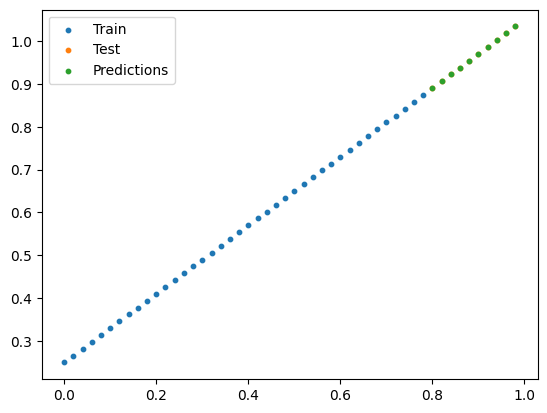

In [911]:
plot_predictions(y_pred=y_pred_test.cpu())
model_1.state_dict()

## PERFECTOS

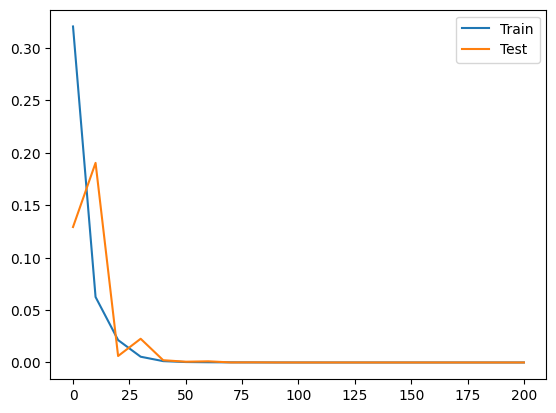

In [912]:
plt.plot(epochs_values, train_mae_values, label="Train")
plt.plot(epochs_values, torch.tensor(test_mae_values).numpy(),label="Test")

plt.legend()

In [913]:
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.8000]], device='cuda:0')),
             ('linear.bias', tensor([0.2500], device='cuda:0'))])

In [914]:
torch.save(obj=model_1.state_dict(),f="models/best-models.pth")

In [915]:
loaded_model_1 = LinearRegressionModel()

In [916]:
loaded_model_1.state_dict()

OrderedDict([('linear.weight', tensor([[-0.2343]])),
             ('linear.bias', tensor([0.9186]))])

In [917]:
loaded_state_dict = torch.load("models/best-models.pth", weights_only=True)


loaded_model_1.load_state_dict(loaded_state_dict)

loaded_model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.8000]])),
             ('linear.bias', tensor([0.2500]))])

In [918]:
loaded_model_1.to(device)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [919]:
loaded_model_1.eval()

with torch.inference_mode():
    loaded_y_pred = loaded_model_1(X_test)


loaded_y_pred == y_pred_test

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')